In [3]:
import sys
sys.path.append("../Decision Tree")
# from TreeNode import TreeNode
from DecisionTree import ID3
import pandas as pd
from utils import predict, calculate_error_rate, preprocess_numerical_columns

class BaggedTrees:
    def __init__(self, n_trees):
        self.n_trees = n_trees
        self.trees = []

    def fit(self, data, attributes):
        for _ in range(self.n_trees):
            # 1. Sample with replacement from data
            bootstrap_sample = data.sample(n=len(data), replace=True)
            
            # 2. Train a decision tree on this sample
            tree = ID3(bootstrap_sample, attributes, float('inf'))
            self.trees.append(tree)

    def predict_tree(self, tree, instance):
        node = tree
        while node.children: 
            attribute_name = node.attributes 
            attribute_value = instance[attribute_name]
            matched_child = None
            for child in node.children:
                if child.attributes == attribute_value:  
                    matched_child = child  
                    break
            if matched_child:
                node = matched_child
                for subnode in node.children:
                    node = subnode
            else:
                break
        return node.label

    def predict(self, dataset):
        all_predictions = []

        # For each instance in the dataset
        for _, instance in dataset.iterrows():
            # Predict with each tree and vote
            predictions = [self.predict_tree(tree, instance) for tree in self.trees]
            # Append the majority vote to all_predictions
            all_predictions.append(max(set(predictions), key=predictions.count))

        return all_predictions


In [21]:
# # bank

# # Test for real data set
# def preprocess_data(df):
#     # Convert continuous attributes to binary
#     for column in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
#         median = df[column].median()
#         df[column] = df[column].apply(lambda x: 1 if x > median else 0)
    
#     # Note: For columns with "unknown", we'll leave them as is. Pandas will treat them as a separate category.
    
#     return df

# # Load the training and test data
# test_file_path = "Data/bank-4/test.csv"
# train_file_path = "Data/bank-4/train.csv"
# column_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
# df_bank_train = pd.read_csv(train_file_path, names=column_names)
# df_bank_test = pd.read_csv(test_file_path, names=column_names)
# bank_attributes = df_bank_train.columns.tolist()[:-1]

# # Apply preprocessing to train and test datasets
# train_data = preprocess_data(df_bank_train)
# test_data = preprocess_data(df_bank_test)
# attributes = bank_attributes


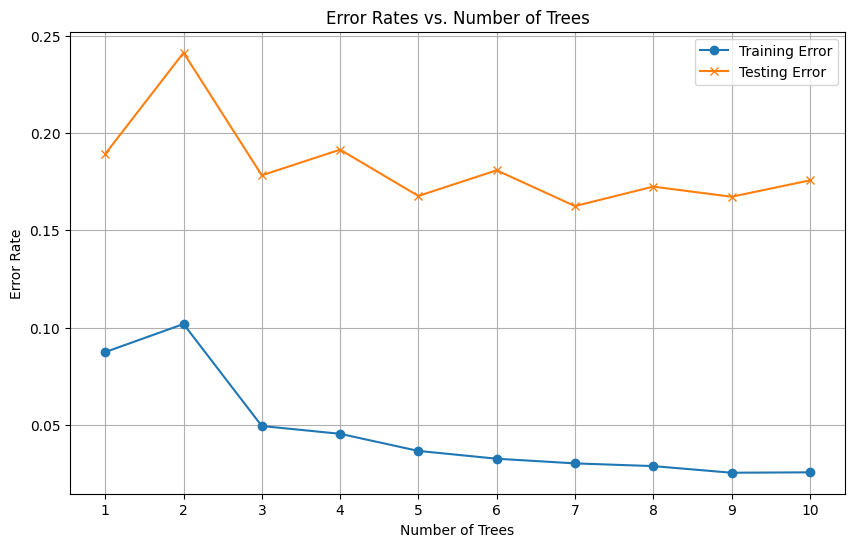

In [22]:
# import matplotlib.pyplot as plt

# training_errors = []
# testing_errors = []

# for n in range(1, 11):  # Looping n from 1 to 500
#     bagged_model = BaggedTrees(n_trees=n)
#     bagged_model.fit(train_data, attributes)

#     # Training error
#     predictions = bagged_model.predict(train_data)
#     true_labels_train = train_data.iloc[:, -1].tolist()
#     error_rate_train = calculate_error_rate(predictions, true_labels_train)
#     training_errors.append(error_rate_train)

#     # Testing error
#     predictions = bagged_model.predict(test_data)
#     true_labels_test = test_data.iloc[:, -1].tolist()
#     error_rate_test = calculate_error_rate(predictions, true_labels_test)
#     testing_errors.append(error_rate_test)

# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 11), training_errors, label='Training Error', marker='o')
# plt.plot(range(1, 11), testing_errors, label='Testing Error', marker='x')
# plt.xlabel('Number of Trees')
# plt.ylabel('Error Rate')
# plt.title('Error Rates vs. Number of Trees')
# plt.legend()
# plt.grid(True)
# plt.xticks(range(1, 11))
# plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
file_path = "Data/credit-card/credit_card.xls"
df = pd.read_excel(file_path, header=1)

# Deal with numeric value
for column in df.columns[:-1]:
    if df[column].dtype == 'int64':
        median_value = df[column].median()
        df[column] = (df[column] >= median_value).astype(int)

train_data, test_data = train_test_split(df, train_size=24000, test_size=6000, random_state=42)
attributes =  train_data.columns.tolist()[:-1]
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)
train_data.head()

Training data shape: (24000, 25)
Testing data shape: (6000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
21753,1,0,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
251,0,0,0,1,1,0,1,1,1,1,...,1,1,0,1,0,0,0,0,0,0
22941,1,1,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
618,0,0,0,0,1,0,1,1,1,1,...,1,1,1,0,0,1,1,1,1,0
17090,1,0,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


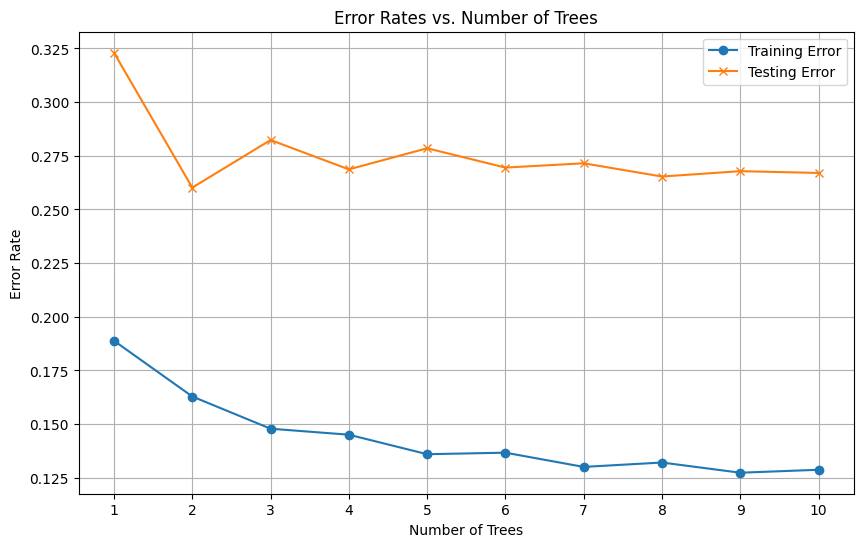

In [33]:
# import matplotlib.pyplot as plt

# training_errors = []
# testing_errors = []

# for n in range(1, 11):  # Looping n from 1 to 500
#     bagged_model = BaggedTrees(n_trees=n)
#     bagged_model.fit(train_data, attributes)

#     # Training error
#     predictions = bagged_model.predict(train_data)
#     true_labels_train = train_data.iloc[:, -1].tolist()
#     error_rate_train = calculate_error_rate(predictions, true_labels_train)
#     training_errors.append(error_rate_train)

#     # Testing error
#     predictions = bagged_model.predict(test_data)
#     true_labels_test = test_data.iloc[:, -1].tolist()
#     error_rate_test = calculate_error_rate(predictions, true_labels_test)
#     testing_errors.append(error_rate_test)

# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 11), training_errors, label='Training Error', marker='o')
# plt.plot(range(1, 11), testing_errors, label='Testing Error', marker='x')
# plt.xlabel('Number of Trees')
# plt.ylabel('Error Rate')
# plt.title('Error Rates vs. Number of Trees')
# plt.legend()
# plt.grid(True)
# plt.xticks(range(1, 11))
# plt.show()

In [1]:
# rf

# import sys
# sys.path.append("../Decision Tree")
from DecisionTree import ID3
import pandas as pd
import numpy as np


def predict_tree(tree, df_test):
    """
    tree: The tree that has been built from ID3
    df_test: test dataset, dataframe
    return: a list of all prediction labels
    """
    predictions = []
    for index, row in df_test.iterrows():
        node = tree
        while node.children:
            attribute_name = node.attributes
            attribute_value = row[attribute_name]
            matched_child = None
            for child in node.children:
                if child.attributes == attribute_value:
                    matched_child = child
                    break
            if matched_child:
                node = matched_child
                for subnode in node.children:
                    node = subnode
            else:
                break
        predictions.append(node.label)
    return predictions

class RandomForest:
    def __init__(self, n_trees, feature_subset_size):
        self.n_trees = n_trees
        self.feature_subset_size = feature_subset_size
        self.trees = []

    def fit(self, data, attributes):
        for _ in range(self.n_trees):
            # Sample with replacement from data
            bootstrap_sample = data.sample(n=len(data), replace=True)
            #def ID3(S, Attributes, max_depth, feature_subset_size=None, purity_measurement=None, root=None):

            # Train a decision tree on this sample with feature subsetting
            # print(attributes)
            # print(type(attributes))
            # print(self.feature_subset_size)
            # print(type(self.feature_subset_size))
            # print([type(attribute) for attribute in attributes])


            tree = ID3(S=bootstrap_sample, Attributes=attributes, max_depth = float('inf'),feature_subset_size= self.feature_subset_size, purity_measurement="entropy")
            self.trees.append(tree)

    def predict_single_tree(self, tree_index, dataset):
        if tree_index >= len(self.trees):
            raise ValueError("Tree index out of range.")
        
        return predict_tree(self.trees[tree_index], dataset)

    def predict(self, dataset):
        all_predictions = []

        for _, instance in dataset.iterrows():
            tree_predictions = [predict_tree(tree, pd.DataFrame([instance]))[0] for tree in self.trees]
            all_predictions.append(max(set(tree_predictions), key=tree_predictions.count))

        return all_predictions


Training Random Forest with 1 trees and feature subset size 2 ...
Training Error Rate: 0.18591666666666667 | Testing Error Rate: 0.31383333333333335

Training Random Forest with 2 trees and feature subset size 2 ...
Training Error Rate: 0.16241666666666665 | Testing Error Rate: 0.26316666666666666

Training Random Forest with 3 trees and feature subset size 2 ...
Training Error Rate: 0.14916666666666667 | Testing Error Rate: 0.29

Training Random Forest with 4 trees and feature subset size 2 ...
Training Error Rate: 0.14533333333333334 | Testing Error Rate: 0.2643333333333333

Training Random Forest with 5 trees and feature subset size 2 ...
Training Error Rate: 0.13654166666666667 | Testing Error Rate: 0.28733333333333333

Training Random Forest with 6 trees and feature subset size 2 ...
Training Error Rate: 0.13658333333333333 | Testing Error Rate: 0.27016666666666667

Training Random Forest with 7 trees and feature subset size 2 ...
Training Error Rate: 0.130375 | Testing Error Rate

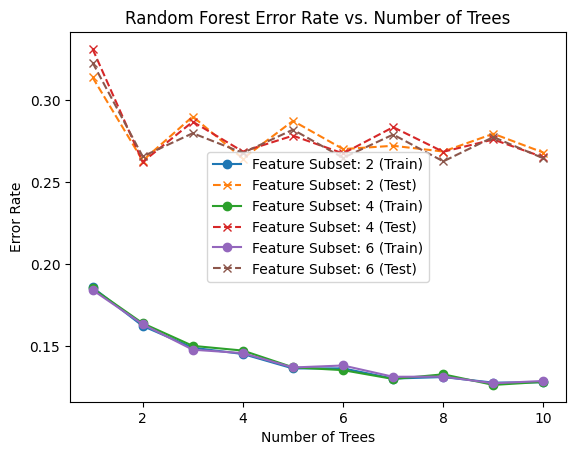

In [5]:
# Lists to store results
trees_range = list(range(1, 11))
feature_subsets = [2, 4, 6]
results_train = {}
results_test = {}

for feature_subset in feature_subsets:
    error_rates_train = []
    error_rates_test = []
    for n_trees in trees_range:
        print(f"Training Random Forest with {n_trees} trees and feature subset size {feature_subset} ...")
        
        # Initialize and train RandomForest
        rf_model = RandomForest(n_trees, feature_subset)
        rf_model.fit(train_data, attributes)
        
        # Predict and calculate error rate on training data
        predictions_train = rf_model.predict(train_data)
        true_labels_train = train_data.iloc[:, -1].tolist()
        error_rate_train = calculate_error_rate(predictions_train, true_labels_train)
        error_rates_train.append(error_rate_train)
        
        # Predict and calculate error rate on test data
        predictions_test = rf_model.predict(test_data)
        true_labels_test = test_data.iloc[:, -1].tolist()
        error_rate_test = calculate_error_rate(predictions_test, true_labels_test)
        error_rates_test.append(error_rate_test)
        
        print(f"Training Error Rate: {error_rate_train} | Testing Error Rate: {error_rate_test}\n")
    
    results_train[feature_subset] = error_rates_train
    results_test[feature_subset] = error_rates_test

# Plotting the results
import matplotlib.pyplot as plt

for feature_subset in feature_subsets:
    plt.plot(trees_range, results_train[feature_subset], '-o', label=f"Feature Subset: {feature_subset} (Train)")
    plt.plot(trees_range, results_test[feature_subset], '--x', label=f"Feature Subset: {feature_subset} (Test)")

plt.xlabel("Number of Trees")
plt.ylabel("Error Rate")
plt.title("Random Forest Error Rate vs. Number of Trees")
plt.legend()
plt.show()


In [6]:
from BaggedTree import BaggedTrees, calculate_error_rate, run_bagged_trees_experiment

run_bagged_trees_experiment(train_data, test_data, attributes)

NameError: name 'np' is not defined